# Import Relevant Packages

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

import seaborn as sns

np.random.seed(0)

# Data

In [23]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visual Examples

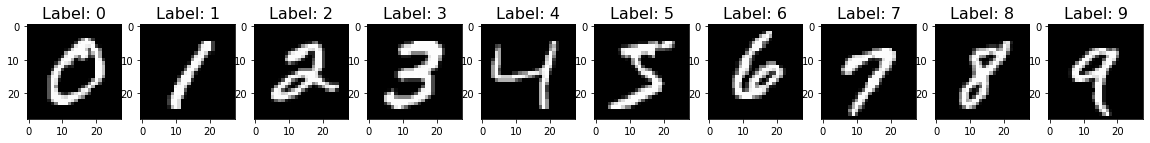

In [25]:
num_classes = 10
f, ax = plt.subplots(1,num_classes,figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [26]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [27]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [28]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [29]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [30]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [31]:
from sklearn import metrics
model = Sequential()
model.add(Dense(units =128, input_shape = (784,), activation= 'relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation= 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [32]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y = y_train, batch_size=batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.6010 - accuracy: 0.8266
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2313 - accuracy: 0.9331
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1688 - accuracy: 0.9523
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1324 - accuracy: 0.9609
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1094 - accuracy: 0.9678
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0921 - accuracy: 0.9730
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0787 - accuracy: 0.9768
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0684 - accuracy: 0.9803
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0585 - accuracy: 0.9820
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0528 - accura

# Evaluate

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss,test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9759
Test Loss: 0.0797031819820404, Test Accuracy: 0.9758999943733215


In [34]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.09146114e-07 5.37388757e-07 1.67829603e-05 ... 9.99683738e-01
  2.59266159e-07 4.83289796e-06]
 [9.15850862e-09 1.95351153e-04 9.99760211e-01 ... 9.93460425e-09
  6.52944891e-07 1.08410824e-11]
 [2.86949057e-06 9.98274684e-01 1.65206307e-04 ... 8.33383994e-04
  1.02279038e-04 3.51336166e-05]
 ...
 [1.55833513e-10 1.52266200e-08 1.88745658e-10 ... 1.52781558e-06
  2.70559553e-07 9.30718015e-05]
 [2.10183444e-08 1.76376943e-07 1.16149937e-10 ... 2.94719293e-09
  9.39993697e-06 3.58548888e-08]
 [2.59829989e-07 2.70937695e-09 7.31134264e-09 ... 8.15992347e-13
  1.55391078e-08 7.31122718e-10]]
[7 2 1 ... 4 5 6]


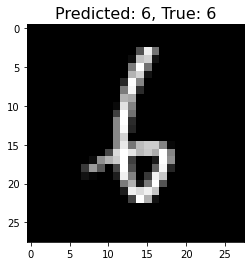

In [35]:
#Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class,y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

#Confusion Matrix

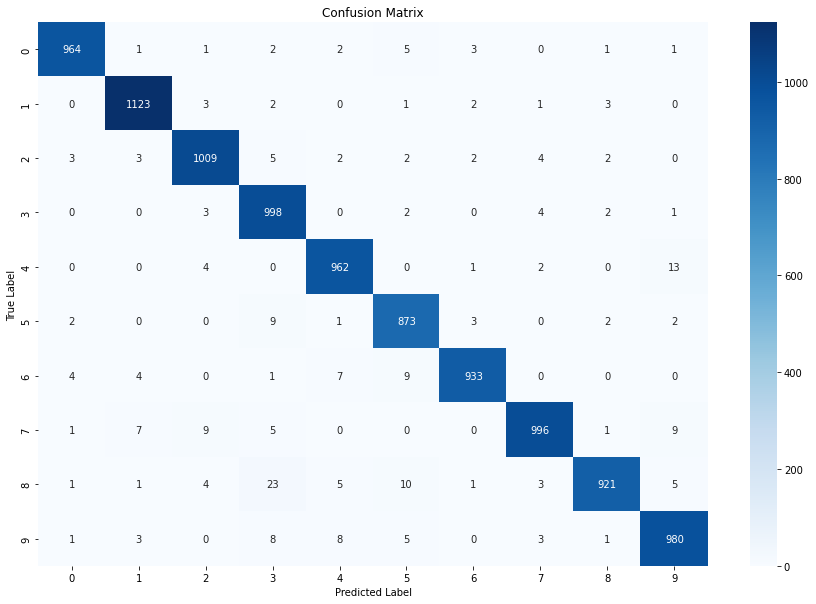

In [36]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d',ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [37]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [38]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones
 

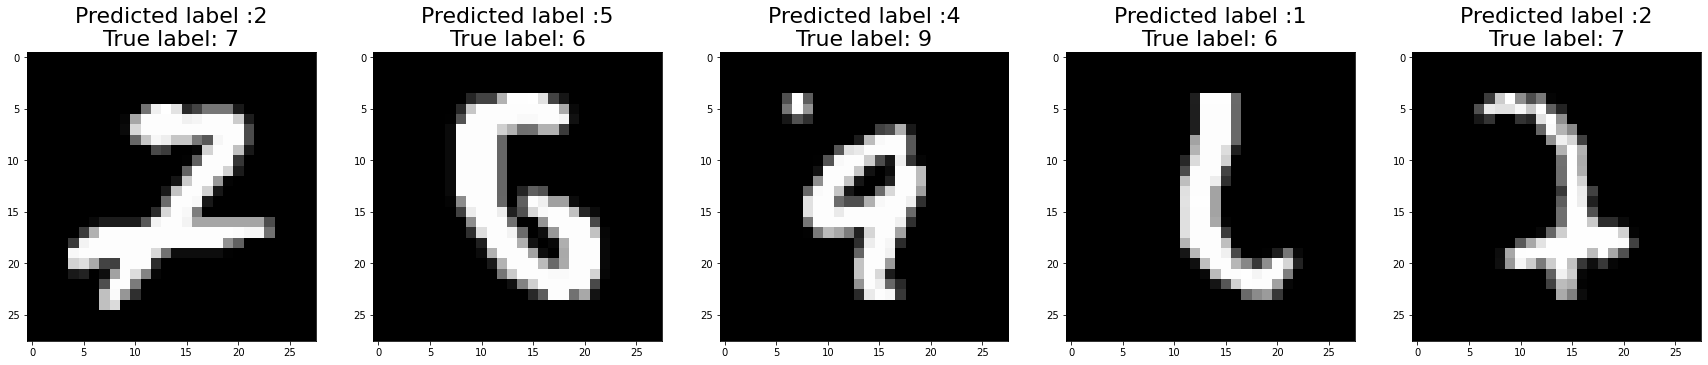

In [39]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
